# Лабораторная 3
## Подраздел: Кубический сплайн

* Cтудент: Ефимов А.В.
* Группа: М8О-307Б
* Вариант: 7

## Задание

Построить кубический сплайн для функции, 
заданной в узлах интерполяции, предполагая,
что сплайн имеет нулевую кривизну при $x=x_0$ и $x=x_4$.
Вычислить значение функции в точке $x=X^*$. 

## Решение

Загрузка библиотек:

In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from tridiagonal import solve_tridiagonal

Подсчет коэффициентов многочленов:

In [2]:
def make_splines(xs, ys):
    def get_diffs(xs):
        dx = np.zeros_like(xs)
        dx[1:] = np.diff(xs)
        return dx
    
    def get_a_coeffs(ys):
        a = np.zeros_like(ys)
        a[1:] = ys[:-1]
        return a
    
    def get_c_coeffs(dx, ys):
        n = len(ys)
        b = np.array([3 * ( (ys[i]-ys[i-1])/dx[i] - (ys[i-1]-ys[i-2])/dx[i-1] ) for i in range(2,n) ])
        u = dx[2:-1]
        m = 2*( dx[1:-1] + dx[2:] )
        l = dx[2:-1]
        
        c = np.zeros_like(ys)
        c[2:] = solve_tridiagonal(u.tolist(), m.tolist(), l.tolist(), b.tolist())
        return np.array(c)
    
    def get_b_coeffs(dx, ys, c):
        b = np.zeros_like(ys)
        b[1:-1] = [(ys[i]-ys[i-1])/dx[i] - dx[i]*(c[i+1] + 2*c[i])/3 for i in range(1,len(ys)-1)]
        b[-1] = (ys[-1]-ys[-2])/dx[-1] - 2/3*dx[-1]*c[-1]
        return b

    def get_d_coeffs(dx, ys, c):
        d = np.zeros_like(ys)
        l = [(c[i+1]-c[i])/(3*dx[i]) for i in range(1, len(dx) - 1)]
        d[1:-1] = l
        d[-1] = -c[-1]/(3*dx[-1])
        return d
    
    dx = get_diffs(xs)
    a  = get_a_coeffs(ys)
    c  = get_c_coeffs(dx, ys)
    b  = get_b_coeffs(dx, ys, c)
    d  = get_d_coeffs(dx, ys, c)
    
    return (a, b, c, d)

Интерполяция:

In [3]:
def interpolate(x, xs, a, b, c, d):
    def find_interval(x, xs):
        for i in range(1, len(xs)):
            if x >= xs[i-1] and x <= xs[i]:
                return i

    i = find_interval(x, xs)
    diff = x - xs[i-1]
    return a[i] + b[i] * diff + c[i] * (diff ** 2) + d[i] * (diff ** 3)

Оценка погрешности:

In [4]:
f = lambda x : np.sqrt(x)
points = [(i * 1.7, f(i * 1.7)) for i in range(5)]
x = 3

xs, ys = map(np.array, [list(t) for t in zip(*points)])

print(f"Point x: {xs}")
print(f"Point y: {ys}")

a, b, c, d = make_splines(xs, ys)

real_y   = f(x)
interp_y = interpolate(x, xs, a, b, c, d)
print(f"For point {x} interpolated value is {interp_y}, when expected {f(x)}")
print(f"Error: {1 - min(interp_y, real_y) / max(interp_y, real_y)}")

Point x: [0.  1.7 3.4 5.1 6.8]
Point y: [0.         1.30384048 1.84390889 2.25831796 2.60768096]
For point 3 interpolated value is 1.7531711266906167, when expected 1.7320508075688772
Error: 0.012046923885637661


График:

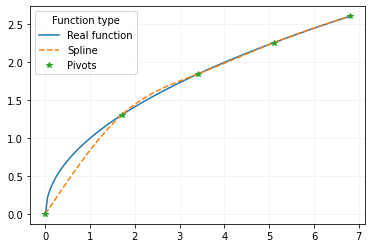

In [5]:
x = np.linspace(xs[0], xs[-1], 140)
plt.plot(x, f(x), label="Real function")
plt.plot(x, [interpolate(xi, xs, a, b, c, d) for xi in x], '--', label="Spline")
plt.plot(xs, ys, '*', label="Pivots")

plt.legend(title="Function type")
plt.grid(color="0.95")
plt.show()